In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #importing data visualization libraries
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Big_data_Analytics_Research_Project/Online Retail.csv",encoding= 'unicode_escape')

In [ ]:
    #from google.colab import drive
#drive.mount('/content/drive') 

In [ ]:
data.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011,4.15,12680,France,16.60


In [ ]:
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)

In [ ]:
df_recency = data.groupby(by='CustomerID',
						as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'InvoiceDate']
recent_date = df_recency['InvoiceDate'].max()
df_recency['Recency'] = df_recency['InvoiceDate'].apply(
	lambda x: (recent_date - x).days)



In [ ]:
df_recency

,CustomerID,InvoiceDate,Recency
0,12346,2011-01-18,326
1,12347,2011-10-31,40
2,12348,2011-09-25,76
3,12349,2011-11-21,19
4,12350,2011-02-02,311
...,...,...,...
4367,18280,2011-07-03,160
4368,18281,2011-12-06,4
4369,18282,2011-09-08,93
4370,18283,2011-11-30,10


In [ ]:
data[data.CustomerID==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18,1.04,12346,United Kingdom,-77183.6


In [ ]:
df_frequency = data.drop_duplicates().groupby(
	by=['CustomerID'], as_index=False)['InvoiceDate'].count()
df_frequency.columns = ['CustomerID', 'Frequency']
df_frequency


,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4367,18280,10
4368,18281,7
4369,18282,13
4370,18283,721


In [ ]:
monetary_df = data.groupby(by='CustomerID', as_index=False)['Sales'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df


,CustomerID,Monetary
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4367,18280,180.60
4368,18281,80.82
4369,18282,176.60
4370,18283,2094.88


In [ ]:
rf_df = df_recency.merge(df_frequency, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(
	columns='InvoiceDate')
rfm_df


,CustomerID,Recency,Frequency,Monetary
0,12346,326,2,0.00
1,12347,40,182,4310.00
2,12348,76,31,1797.24
3,12349,19,73,1757.55
4,12350,311,17,334.40
...,...,...,...,...
4367,18280,160,10,180.60
4368,18281,4,7,80.82
4369,18282,93,13,176.60
4370,18283,10,721,2094.88


In [ ]:
rfm_df[rfm_df<0]=0

In [ ]:
rfm_df


,CustomerID,Recency,Frequency,Monetary
0,12346,326,2,0.00
1,12347,40,182,4310.00
2,12348,76,31,1797.24
3,12349,19,73,1757.55
4,12350,311,17,334.40
...,...,...,...,...
4367,18280,160,10,180.60
4368,18281,4,7,80.82
4369,18282,93,13,176.60
4370,18283,10,721,2094.88


In [ ]:
rfm_df.dropna()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,2,0.00
1,12347,40,182,4310.00
2,12348,76,31,1797.24
3,12349,19,73,1757.55
4,12350,311,17,334.40
...,...,...,...,...
4367,18280,160,10,180.60
4368,18281,4,7,80.82
4369,18282,93,13,176.60
4370,18283,10,721,2094.88


In [ ]:
rfm_df.set_index('CustomerID',inplace=True)

In [ ]:
rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,2,0.00
12347,40,182,4310.00
12348,76,31,1797.24
12349,19,73,1757.55
12350,311,17,334.40
...,...,...,...
18280,160,10,180.60
18281,4,7,80.82
18282,93,13,176.60


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(rfm_df)
final_data=scaler.transform(rfm_df)

In [ ]:
final_data= pd.DataFrame(final_data, columns = ['Recency',	'Frequency',	'Monetary'])
final_data.index= rfm_df.index
final_data

,Recency,Frequency,Monetary
CustomerID,,,
12346,0.467719,0.000007,0.000000
12347,0.057389,0.001340,0.002976
12348,0.109039,0.000222,0.001241
12349,0.027260,0.000533,0.001214
12350,0.446198,0.000118,0.000231
...,...,...,...
18280,0.229555,0.000067,0.000125
18281,0.005739,0.000044,0.000056
18282,0.133429,0.000089,0.000122


In [ ]:
from sklearn.cluster import KMeans

**Elbow Method**

In [ ]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(final_data) 
    wcss.append(kmeans.inertia_)

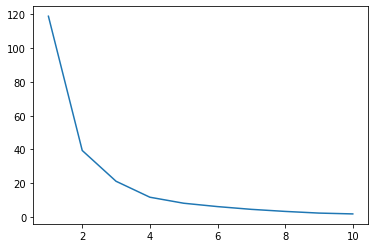

In [ ]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

In [ ]:

kmeans = KMeans(n_clusters = 3, random_state = 42).fit(final_data)

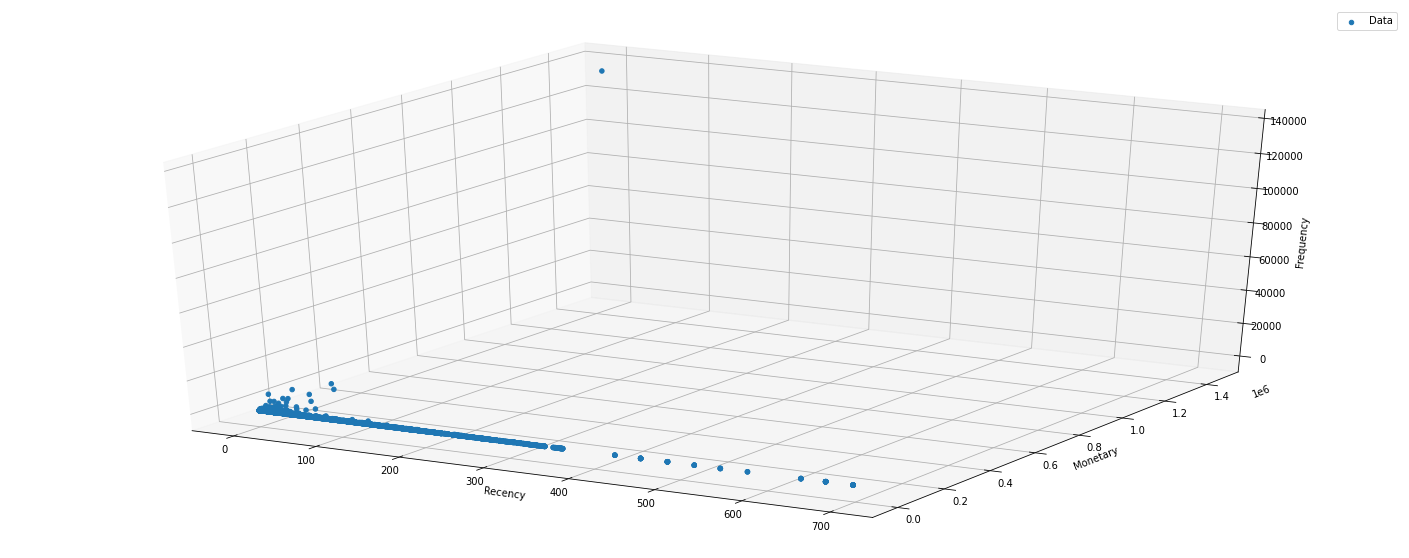

In [ ]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_df.Recency, rfm_df.Monetary,rfm_df.Frequency, alpha=1)  # plot points with cluster dependent colors
#ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c = 'black', s=100, alpha=1)
plt.legend(['Data'])
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')
plt.show()

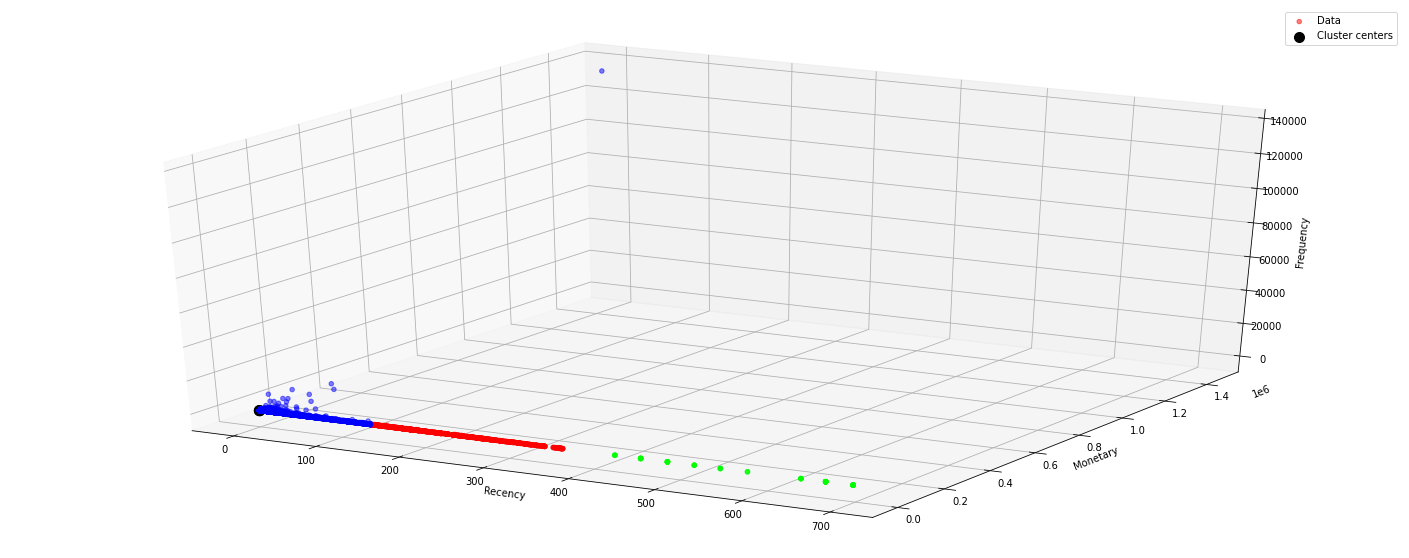

In [ ]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_df.Recency, rfm_df.Monetary,rfm_df.Frequency, c=kmeans.labels_, cmap='brg', alpha=0.5)  # plot points with cluster dependent colors
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c = 'black', s=100, alpha=1)
plt.legend(['Data','Cluster centers'])
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')
plt.show()

In [ ]:
centroids= kmeans.cluster_centers_
centroids

array([[6.25417030e-02, 1.15730685e-03, 1.99779459e-03],
       [3.30096512e-01, 2.26652164e-04, 3.39320812e-04],
       [8.30437324e-01, 1.34282580e-04, 1.67554896e-04]])

In [ ]:
print(rfm_df[rfm_df.Monetary>100000])

            Recency  Frequency    Monetary
CustomerID                                
12415            25        778   123725.45
14156             0       1415   113384.14
14646             2       2085   279489.02
14911             0       5898   132572.62
15287             0     135058  1448167.36
17450             3        350   187482.17
18102            12        433   256438.49


In [ ]:
rfm_df = rfm_df.drop(index=15287)
rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,2,0.00
12347,40,182,4310.00
12348,76,31,1797.24
12349,19,73,1757.55
12350,311,17,334.40
...,...,...,...
18280,160,10,180.60
18281,4,7,80.82
18282,93,13,176.60


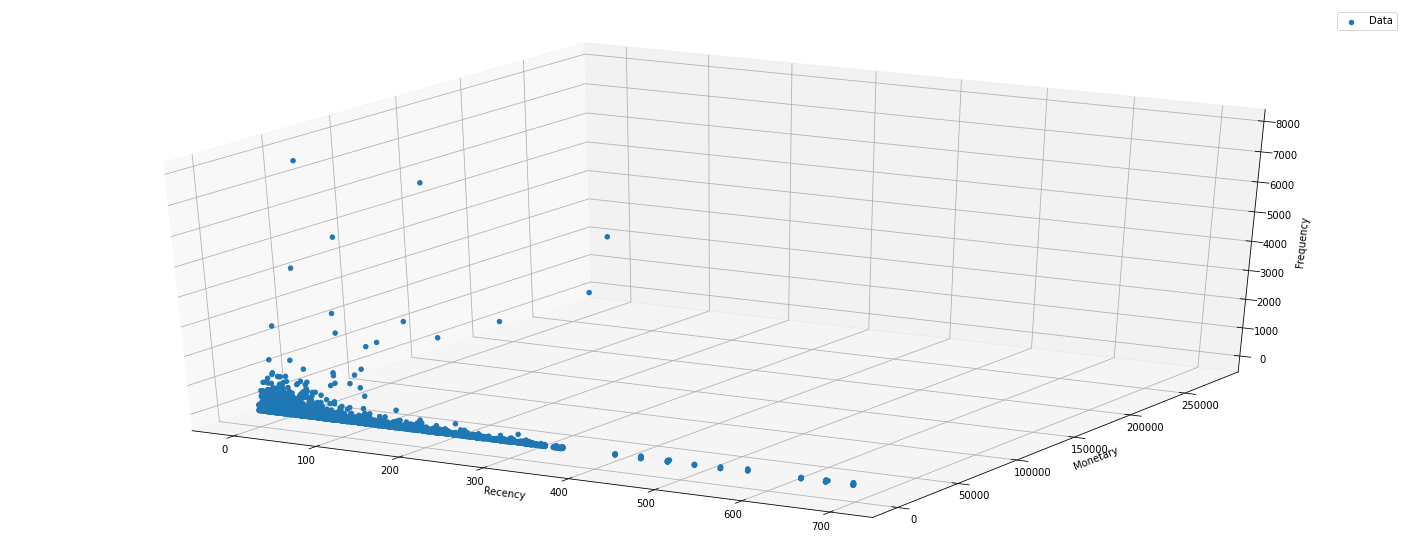

In [ ]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_df.Recency, rfm_df.Monetary,rfm_df.Frequency, alpha=1)  # plot points with cluster dependent colors
#ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c = 'black', s=100, alpha=1)
plt.legend(['Data'])
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')
plt.show()

In [ ]:
scaler.fit(rfm_df)
final_data=scaler.transform(rfm_df)

In [ ]:
final_data[:2000]

array([[4.67718795e-01, 1.28024581e-04, 0.00000000e+00],
       [5.73888092e-02, 2.31724491e-02, 1.54209994e-02],
       [1.09038737e-01, 3.84073742e-03, 6.43044940e-03],
       ...,
       [5.88235294e-02, 3.04698502e-02, 4.74372839e-03],
       [1.43472023e-02, 1.45948022e-02, 1.08444332e-03],
       [7.17360115e-03, 5.23620535e-02, 1.94028159e-01]])

**Elbow Method**

In [ ]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(final_data) 
    wcss.append(kmeans.inertia_)

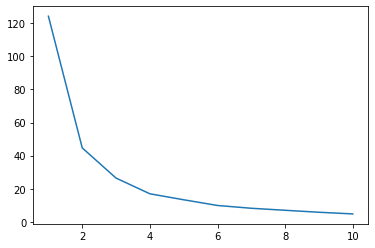

In [ ]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

**Calinski_harabasz_score (CHI Index)**

In [ ]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
ch_index = calinski_harabasz_score(final_data, kmeans.labels_)

print(ch_index)


12268.948635513447


In [ ]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(final_data)
    db_index = calinski_harabasz_score(final_data, kmeans.labels_)
    results.update({i: db_index})


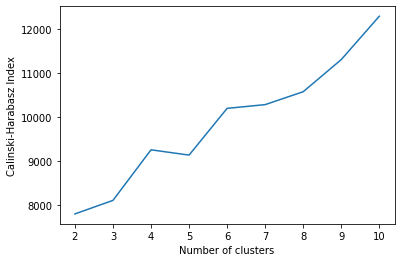

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()


**Davies_bouldin_score**

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
db_index = davies_bouldin_score(final_data, kmeans.labels_)
print(db_index)


0.5360147257812471


In [ ]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(final_data)
    db_index = davies_bouldin_score(final_data, kmeans.labels_)
    results.update({i: db_index})


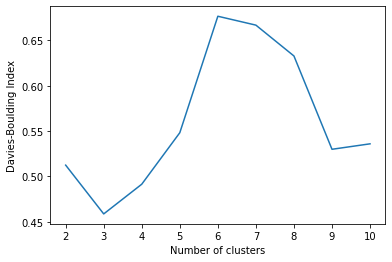

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()


**silhouette_score**

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
score = silhouette_score(final_data, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.498


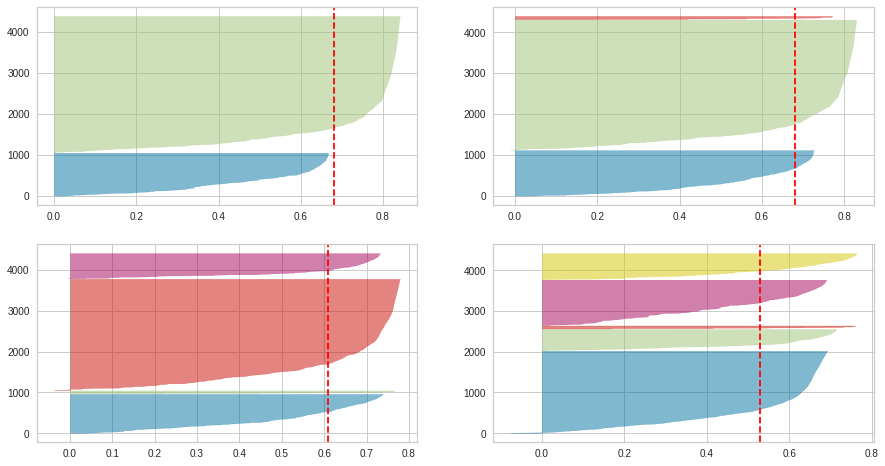

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
  
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(final_data) 

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(final_data)

In [ ]:
final_data= pd.DataFrame(final_data, columns = ['Recency',	'Frequency',	'Monetary'])
final_data.index= rfm_df.index

In [ ]:
final_data

,Recency,Frequency,Monetary
CustomerID,,,
12346,0.467719,0.000128,0.000000
12347,0.057389,0.023172,0.015421
12348,0.109039,0.003841,0.006430
12349,0.027260,0.009218,0.006288
12350,0.446198,0.002048,0.001196
...,...,...,...
18280,0.229555,0.001152,0.000646
18281,0.005739,0.000768,0.000289
18282,0.133429,0.001536,0.000632


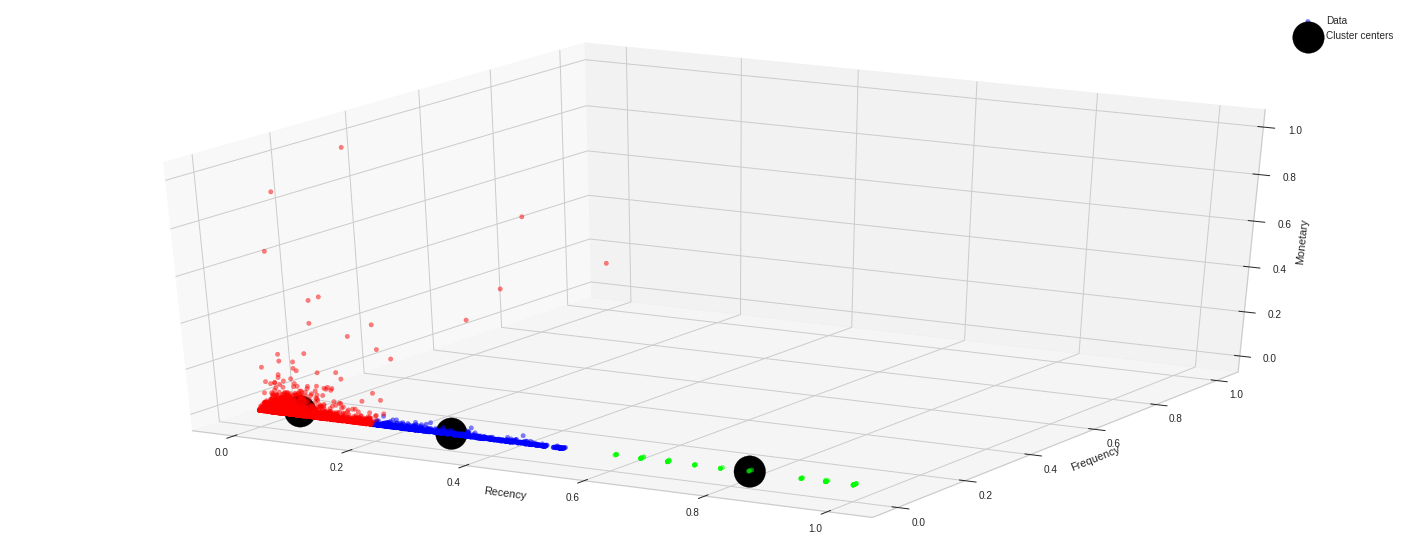

In [ ]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(final_data.Recency, final_data.Frequency,final_data.Monetary, c=kmeans.labels_, cmap='brg', alpha=0.5)  # plot points with cluster dependent colors
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c = 'black', s=1000, alpha=1)
plt.legend(['Data','Cluster centers'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

In [ ]:
centroids= kmeans.cluster_centers_
centroids

array([[0.33009651, 0.00391896, 0.00175818],
       [0.06256139, 0.01457441, 0.00872386],
       [0.83043732, 0.00232183, 0.00086818]])

In [ ]:
from scipy.spatial.distance import cdist
D = cdist(final_data, centroids, 'euclidean')
sum(np.min(D, axis=1))

256.45515030908933

In [ ]:
from scipy.spatial import distance_matrix

dist_mat = pd.DataFrame(distance_matrix(final_data, centroids))

In [ ]:
dist_mat

,0,1,2
0,0.137686,0.405509,0.362726
1,0.273728,0.012064,0.773467
2,0.221107,0.047756,0.721422
3,0.302917,0.035789,0.803226
4,0.116118,0.383915,0.384240
...,...,...,...
4366,0.100585,0.167727,0.600883
4367,0.324376,0.059081,0.824700
4368,0.196685,0.072510,0.697009
4369,0.327903,0.091370,0.821049


In [ ]:
dist_mat.groupby(kmeans.predict(final_data)).mean().mean().mean()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


0.3707925208477006

In [ ]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV, GroupKFold

In [ ]:
grid = GridSearchCV(

estimator=KMeans(),
        param_grid={
            'n_clusters':[2,3,4,5,6,7],
            #'n_init':[15,20],
            #'random_state': [42,50]
            #'random_state':[i for i in range(0,60)]
        },
        cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [ ]:
grid.fit(final_data)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=10, estimator=KMeans(), n_jobs=-1,
             param_grid={'n_clusters': [2, 3, 4, 5, 6, 7]},
             scoring='neg_mean_absolute_error')

In [ ]:
print("best parameters are: ", grid.best_params_)

best parameters are:  {'n_clusters': 2}


In [ ]:
#List Of Cutomers

In [135]:
final_data['cluster'] = kmeans.labels_

In [136]:
final_data

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346,0.467719,0.000128,0.000000,0
12347,0.057389,0.023172,0.015421,1
12348,0.109039,0.003841,0.006430,1
12349,0.027260,0.009218,0.006288,1
12350,0.446198,0.002048,0.001196,0
...,...,...,...,...
18280,0.229555,0.001152,0.000646,0
18281,0.005739,0.000768,0.000289,1
18282,0.133429,0.001536,0.000632,1


In [137]:
for i in range(3):
  print("Cluster No: " + str(i) + " has Unique Customer Count = " + str(final_data[final_data.cluster==i]['cluster'].count()))



Cluster No: 0 has Unique Customer Count = 1113
Cluster No: 1 has Unique Customer Count = 3177
Cluster No: 2 has Unique Customer Count = 81


In [138]:
cluster_no = 0
final_data[final_data.cluster==cluster_no]

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346,0.467719,0.000128,0.000000,0
12350,0.446198,0.002048,0.001196,0
12353,0.294118,0.000384,0.000318,0
12354,0.334290,0.007297,0.003862,0
12357,0.261119,0.016643,0.022211,0
...,...,...,...,...
18262,0.202296,0.001536,0.000535,0
18269,0.515065,0.000896,0.000497,0
18270,0.345768,0.001536,0.000855,0
